In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob as glob
import os

In [9]:
seed=np.arange(0,500,2)
frame_skip=[4]
dt_ckf=[0.025]
dt_control=[0.1]
N_radar=[3]
N_steps=[1000]
move_radars = ["no-move_radars","move_radars"]
remove_tmp_images = ["remove_tmp_images"]
save_images = ["no-save_images"]

In [64]:
def get_rmse_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i)

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:,0].mean(axis=0)
    rmse = rmse_array[:,:,1]
    
    return k,rmse

In [72]:
experiment_name = os.path.join("experiment1",f"N_radar={n_radar}-{move_radar}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move = get_rmse_array(filepath)

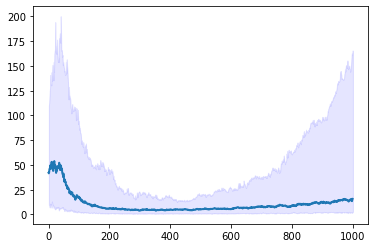

In [73]:
under_line = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.1) #std curves.

In [74]:
experiment_name = os.path.join("experiment1",f"N_radar={n_radar}-{move_radars[0]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_nomove = get_rmse_array(filepath)

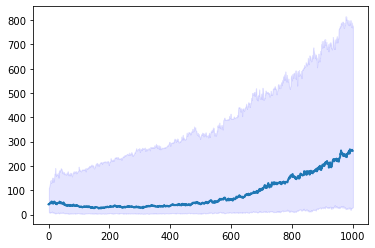

In [75]:
under_line = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.1) #std curves.

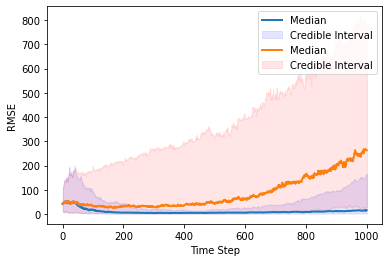

In [82]:
under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="Median") #mean curve.
plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.1,label="Credible Interval") #std curves.

under_line_nomove = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_nomove = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,label="Median") #mean curve.
plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.1,label="Credible Interval") #std curves.
plt.xlabel("Time Step")
plt.ylabel("RMSE")
plt.legend()